### Telemarketing Case
Exploratory Data Analysis and Predictive Modelling(only steps and requirement)

This a telemarketing case study:

* The objective of the case is to identify sales pattern
using all possible combinations of the available fields and implement learning to drive overall sales (Revenue).
* Utilise the opportunity and prepare a business development case for predictive modelling. Explore different available techniques which can be implemented on the business. Objective of the model, list additional data requirement and describe the model- include steps and possible impact on the business.(Note you do not need to actually build a predictive model)

#### This data was taken from [kaggle](https://www.kaggle.com/prabhakar01/telemarketing-case)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df =pd.read_csv('../data_files/telemarketing/dataset_X.csv')

In [4]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 100000 rows and 12 columns


In [5]:
df.head()

,Call_ID,Sale,Agent_ID,Age,Product_ID,Timezone,Phone_code,First_Name,Last_Name,Area_Code,Gender,Call_Count
0,9545434,False,5265,42,147,2,37.0,Jk,Jk,2302,Male,1
1,9211206,False,5226,74,146,2,37.0,Em,Sh,1501,Male,10
2,8873010,False,4452,35,144,2,37.0,BI,MI,1550,Male,9
3,9852034,False,5461,40,149,2,37.0,WT,LI,1401,Male,6
4,9416548,False,5298,26,147,2,37.0,LA,LA,125,Female,12


In [6]:
df.describe()

,Call_ID,Age,Product_ID,Timezone,Phone_code,Call_Count
count,1.000000e+05,100000.000000,100000.000000,100000.000000,99972.0,100000.00000
mean,9.562981e+06,52.558530,147.216690,1.999420,37.0,3.26866
std,4.618927e+05,16.144553,2.182815,0.034054,0.0,2.96882
min,8.432514e+06,25.000000,142.000000,0.000000,37.0,1.00000
25%,9.230592e+06,39.000000,146.000000,2.000000,37.0,1.00000
50%,9.527831e+06,53.000000,147.000000,2.000000,37.0,2.00000
75%,9.919197e+06,66.000000,149.000000,2.000000,37.0,4.00000
max,1.047664e+07,80.000000,151.000000,2.000000,37.0,55.00000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Call_ID     100000 non-null  int64  
 1   Sale        99968 non-null   object 
 2   Agent_ID    97685 non-null   object 
 3   Age         100000 non-null  int64  
 4   Product_ID  100000 non-null  int64  
 5   Timezone    100000 non-null  int64  
 6   Phone_code  99972 non-null   float64
 7   First_Name  99318 non-null   object 
 8   Last_Name   99319 non-null   object 
 9   Area_Code   99540 non-null   object 
 10  Gender      100000 non-null  object 
 11  Call_Count  100000 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 9.2+ MB


In [8]:
df.rename(columns={'Phone_code': 'Phone_Code'}, inplace=True)

In [9]:
df.isna().sum()

Call_ID          0
Sale            32
Agent_ID      2315
Age              0
Product_ID       0
Timezone         0
Phone_Code      28
First_Name     682
Last_Name      681
Area_Code      460
Gender           0
Call_Count       0
dtype: int64

### Data Cleaning

In [10]:
def show_nulls(col):
    null_val = pd.isnull(df[col])
    return df[null_val]

In [11]:
# null_val_in_sale = pd.isnull(df['Sale'])

In [12]:
show_nulls(col='Sale')

,Call_ID,Sale,Agent_ID,Age,Product_ID,Timezone,Phone_Code,First_Name,Last_Name,Area_Code,Gender,Call_Count
3714,10240024,NaN,5423,47,150,2,37.0,JG,FG,1709,Others,1
6731,9865690,NaN,4994,78,149,2,37.0,KA,SA,5099,Others,3
8480,10234662,NaN,5076,43,150,2,37.0,MW,BS,7701,Others,1
11449,9896794,NaN,5298,42,149,2,37.0,UI,NI,2092,Female,2
14425,9860114,NaN,4121,60,149,2,37.0,Sa,Co,2194,Others,2
14754,10002278,NaN,5366,39,149,2,37.0,Co,Ra,2192,Others,2
19192,10258858,NaN,5403,31,150,2,37.0,Ea,Co,2194,Others,1
19627,9903146,NaN,4121,40,149,2,37.0,Ms,Gi,83,Others,3
31050,10176898,NaN,NaN,32,150,2,37.0,RN,MA,1619,Others,2
32408,9380518,NaN,4219,52,146,0,NaN,ki,ko,NaN,Others,1


<AxesSubplot:xlabel='Sale', ylabel='count'>

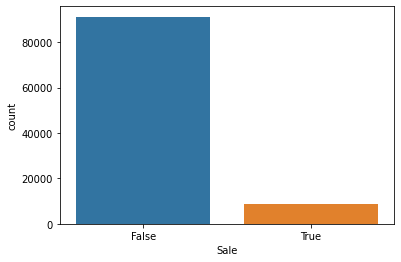

In [13]:
sns.countplot(x='Sale', data=df)

### As we can see from the count plot above the most frequent feature for the Sale column is False. So we are going to fill the null values with False

In [14]:
df['Sale'].fillna(False, inplace=True)

In [15]:
df.isna().sum()

Call_ID          0
Sale             0
Agent_ID      2315
Age              0
Product_ID       0
Timezone         0
Phone_Code      28
First_Name     682
Last_Name      681
Area_Code      460
Gender           0
Call_Count       0
dtype: int64

In [16]:
show_nulls('Agent_ID')

,Call_ID,Sale,Agent_ID,Age,Product_ID,Timezone,Phone_Code,First_Name,Last_Name,Area_Code,Gender,Call_Count
38,9517532,False,NaN,42,147,2,37.0,Jz,Jz,1947,Male,1
52,9272158,False,NaN,50,146,2,37.0,KS,LD,181,Male,3
92,9829242,False,NaN,73,148,2,37.0,Ct,Ma,158,Female,6
94,10261690,False,NaN,49,150,2,37.0,Km,Le,6070,Female,2
112,9890938,False,NaN,63,149,2,37.0,a,kk,2940,Female,2
...,...,...,...,...,...,...,...,...,...,...,...,...
99926,10003078,False,NaN,49,149,2,37.0,Je,Ve,6529,Female,8
99935,9209630,False,NaN,66,146,2,37.0,MI,BO,9783,Female,4
99954,8767844,False,NaN,67,143,2,37.0,Ln,Ps,186,Male,4
99961,9253402,False,NaN,46,146,2,37.0,fa,rh,4001,Female,4


In [17]:
df['Agent_ID'].value_counts()

4955         1969
5077         1946
5271         1911
5001         1854
5146         1852
             ... 
4734            2
5063            2
QUEUE4804       2
QUEUE5386       1
QUEUE5472       1
Name: Agent_ID, Length: 243, dtype: int64

### We have 2315 null values for Agent_ID column. Now we are gioing to fill them with previous ones becuase ony two values repeated once except them there are no any unique values

In [18]:
df['Agent_ID'].fillna(method ='pad', inplace=True)

In [19]:
df.isna().sum()

Call_ID         0
Sale            0
Agent_ID        0
Age             0
Product_ID      0
Timezone        0
Phone_Code     28
First_Name    682
Last_Name     681
Area_Code     460
Gender          0
Call_Count      0
dtype: int64

In [20]:
show_nulls('Phone_Code')

,Call_ID,Sale,Agent_ID,Age,Product_ID,Timezone,Phone_Code,First_Name,Last_Name,Area_Code,Gender,Call_Count
7850,9563994,True,4702,66,147,0,NaN,No,Mi,3901,Others,2
11559,9383584,True,4219,56,146,0,NaN,Ta,Ma,NaN,Others,1
18258,9663138,False,4992,80,147,0,NaN,TA,MI,2090,Others,2
18952,9200174,False,4992,66,145,0,NaN,Km,Cr,154,Male,4
19988,9663090,False,4219,25,147,0,NaN,La,Mn,NaN,Others,2
23570,10462620,False,4219,75,151,0,NaN,Md,Wa,NaN,Others,1
28297,8794740,False,5002,78,143,0,NaN,sl,bh,NaN,Others,3
30661,9844132,True,4304,31,148,0,NaN,pi,mi,1515,Male,1
31713,10476640,False,4219,55,151,0,NaN,Mt,Ky,NaN,Others,1
32408,9380518,False,4219,52,146,0,NaN,ki,ko,NaN,Others,1


In [21]:
df['Phone_Code'].value_counts()

37.0    99972
Name: Phone_Code, dtype: int64

### In the datasets there is only one phone code such as 37. Now we are filling nulls with this phone code

In [22]:
df['Phone_Code'].fillna(value=37, inplace=True)

In [23]:
show_nulls('Area_Code')

,Call_ID,Sale,Agent_ID,Age,Product_ID,Timezone,Phone_Code,First_Name,Last_Name,Area_Code,Gender,Call_Count
305,9120862,False,5245,69,145,2,37.0,hn,py,NaN,Male,1
1111,9878572,False,5416,72,149,2,37.0,Su,Me,NaN,Male,4
1288,10372880,False,4452,31,151,2,37.0,la,ma,NaN,Male,4
1619,9433638,False,4121,43,147,2,37.0,ZI,ZI,NaN,Male,1
1881,9733346,False,4956,61,148,2,37.0,na,le,NaN,Female,1
...,...,...,...,...,...,...,...,...,...,...,...,...
98309,9855802,False,5405,62,149,2,37.0,BD,FN,NaN,Male,2
99412,10292406,True,4709,69,151,2,37.0,Se,Qa,NaN,Male,1
99651,9045436,False,4912,34,145,2,37.0,Ke,Re,NaN,Male,6
99714,9918978,False,5381,64,149,2,37.0,Mc,Or,NaN,Female,2


In [24]:
df['Area_Code'].fillna(df['Area_Code'].mode()[0], inplace=True)

In [25]:
df.isna().sum()

Call_ID         0
Sale            0
Agent_ID        0
Age             0
Product_ID      0
Timezone        0
Phone_Code      0
First_Name    682
Last_Name     681
Area_Code       0
Gender          0
Call_Count      0
dtype: int64

In [26]:
show_nulls('First_Name')

,Call_ID,Sale,Agent_ID,Age,Product_ID,Timezone,Phone_Code,First_Name,Last_Name,Area_Code,Gender,Call_Count
80,9395328,False,5296,38,147,2,37.0,NaN,NaN,2001,Female,2
186,9272504,False,4452,74,146,2,37.0,NaN,SO,7100,Female,1
310,9760244,True,5393,50,148,2,37.0,NaN,MA,7570,Female,10
404,8863244,False,5266,77,144,2,37.0,NaN,TE,1021,Female,9
889,9430636,False,4926,72,147,2,37.0,NaN,NaN,7755,Female,1
...,...,...,...,...,...,...,...,...,...,...,...,...
97935,9449622,False,4912,79,147,2,37.0,NaN,NaN,1809,Female,4
98475,10284568,False,4804,35,151,2,37.0,NaN,HI,4110,Female,2
98481,10279472,False,5401,50,151,2,37.0,NaN,DE,83,Female,1
98522,9177212,True,5146,34,145,2,37.0,NaN,NaN,4027,Female,4


In [29]:
df['First_Name'].fillna('Ma', inplace=True)

In [31]:
df['Last_Name'].fillna(df['Last_Name'].mode()[0], inplace=True)

In [32]:
df.isna().sum()

Call_ID       0
Sale          0
Agent_ID      0
Age           0
Product_ID    0
Timezone      0
Phone_Code    0
First_Name    0
Last_Name     0
Area_Code     0
Gender        0
Call_Count    0
dtype: int64

In [33]:
df.head()

,Call_ID,Sale,Agent_ID,Age,Product_ID,Timezone,Phone_Code,First_Name,Last_Name,Area_Code,Gender,Call_Count
0,9545434,False,5265,42,147,2,37.0,Jk,Jk,2302,Male,1
1,9211206,False,5226,74,146,2,37.0,Em,Sh,1501,Male,10
2,8873010,False,4452,35,144,2,37.0,BI,MI,1550,Male,9
3,9852034,False,5461,40,149,2,37.0,WT,LI,1401,Male,6
4,9416548,False,5298,26,147,2,37.0,LA,LA,125,Female,12


### Now our dataset is clean. Let's start analysing

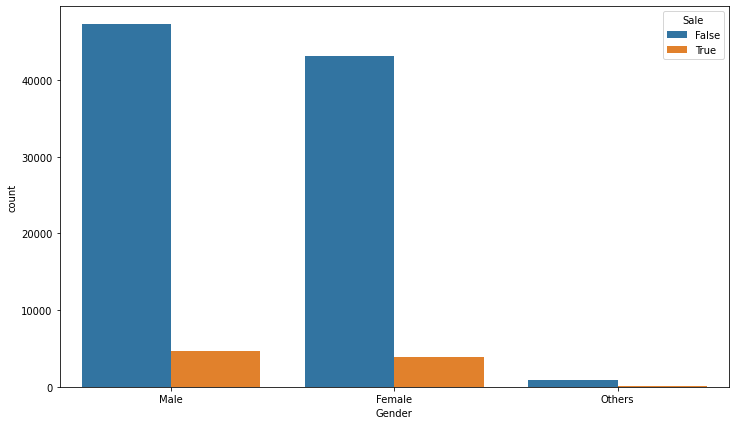

In [36]:
plt.figure(figsize=(12, 7))
sns.countplot(x='Gender', data=df, hue='Sale')
plt.show()

In [41]:
df['Product_ID'].value_counts()

148    15631
149    15418
146    15311
147    15201
145    10731
150    10120
144     6074
151     5954
143     3821
142     1739
Name: Product_ID, dtype: int64

### There are 10 types of product in the telemarketing 6 of them are most frequent. It can be seen the graph below

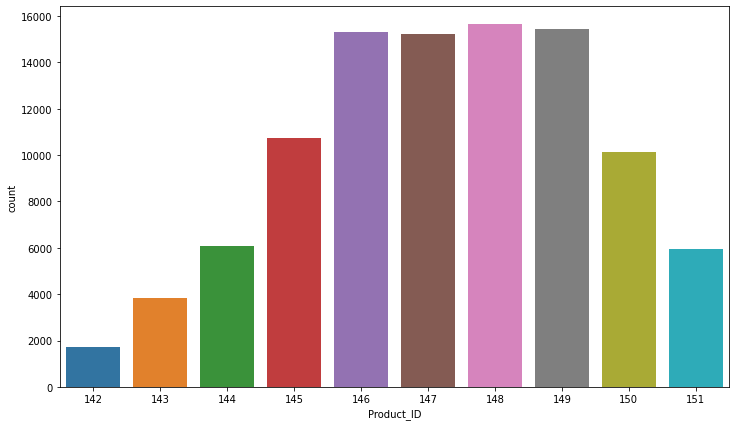

In [42]:
plt.figure(figsize=(12, 7))
sns.countplot(x='Product_ID', data=df)
plt.show()

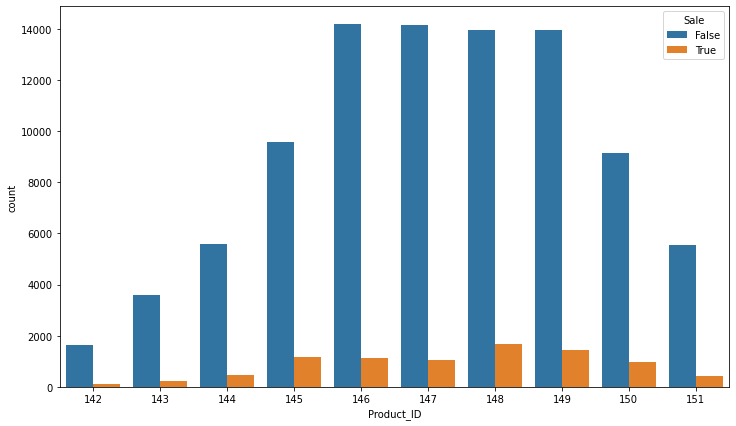

In [43]:
plt.figure(figsize=(12, 7))
sns.countplot(x='Product_ID', data=df, hue='Sale')
plt.show()